# Chapter 7:  Data Science

## Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [1]:
import pandas as pd
#df = pd.read_csv("covid19.csv")
#df.to_csv("covid19.csv", index=False)
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [3]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


*What are the columns?*

In [4]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [5]:
df.shape

(61942, 5)

## EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [67]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


*Cases and Deaths in the USA due to Covid-19*

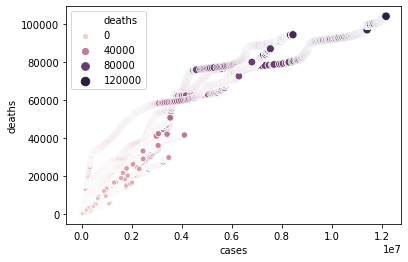

In [8]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

*Filter results by date range*

In [41]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}") 

Today 2023-08-02
Two days ago 2023-07-31


In [42]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,


In [43]:
past_date = "2020-08-02"
df.loc[past_date].head()

,state,fips,cases,deaths
date,,,,
2020-08-02,Alabama,1,91444,1627
2020-08-02,Alaska,2,3982,22
2020-08-02,Arizona,4,178473,3769
2020-08-02,Arkansas,5,43810,464
2020-08-02,California,6,515937,9399


*The distribution of the data by date*

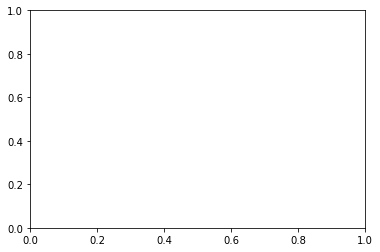

In [44]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

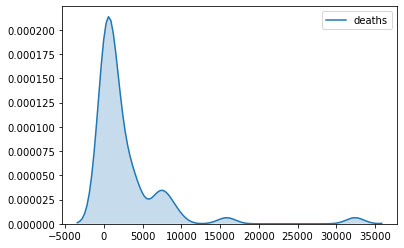

In [48]:
sns.kdeplot(df.loc[past_date]["deaths"], shade=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [45]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,


In [46]:
current_df = df.loc[past_date].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-08-02,New York,36,421008,32401
2020-08-02,New Jersey,34,184225,15836
2020-08-02,California,6,515937,9399
2020-08-02,Massachusetts,25,118458,8638
2020-08-02,Illinois,17,183714,7718
2020-08-02,Texas,48,454759,7520
2020-08-02,Pennsylvania,42,118038,7274
2020-08-02,Florida,12,487124,7083
2020-08-02,Michigan,26,91857,6460


*There should be 50 states and District of Columbia*

In [49]:
current_df.shape

(55, 4)

In [66]:
current_df

,state,fips,cases,deaths
date,,,,
2020-08-02,New York,36,421008,32401
2020-08-02,New Jersey,34,184225,15836
2020-08-02,California,6,515937,9399
2020-08-02,Massachusetts,25,118458,8638
2020-08-02,Illinois,17,183714,7718
2020-08-02,Texas,48,454759,7520
2020-08-02,Pennsylvania,42,118038,7274
2020-08-02,Florida,12,487124,7083
2020-08-02,Michigan,26,91857,6460


### State Based Analysis

*Get 10 states and subset*

In [53]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New Jersey',
 'California',
 'Massachusetts',
 'Illinois',
 'Texas',
 'Pennsylvania',
 'Florida',
 'Michigan',
 'Connecticut']

In [54]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [55]:
set(top_states_df.state.values)

{'California',
 'Connecticut',
 'Florida',
 'Illinois',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Texas'}

<Figure size 1080x360 with 0 Axes>

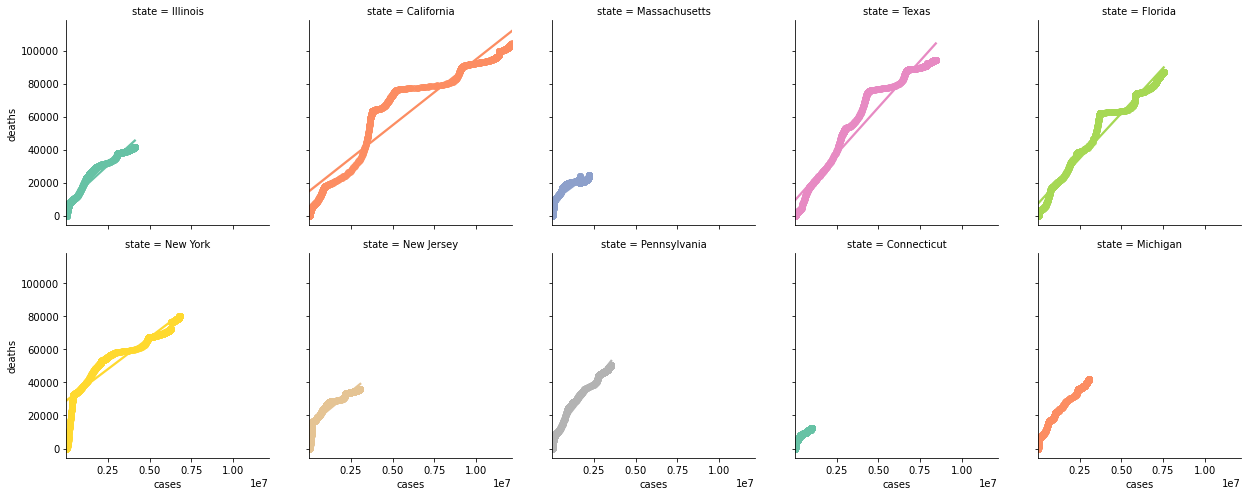

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [59]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,Connecticut,1,0
2020-03-09,Connecticut,2,0
2020-03-10,Connecticut,2,0
2020-03-10,Michigan,2,0
2020-03-11,Michigan,2,0


### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [60]:
cdc_2013 = pd.read_csv("education_sugar_cdc_2003.csv")
cdc_2013.to_csv("education_sugar_cdc_2003.csv", index=False)
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


*Combine Sugar Data and Covid-19 Data*

In [61]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,California,6,2,0,22.9
2,California,6,2,0,22.9
3,California,6,2,0,22.9
4,California,6,2,0,22.9


*What about data from the 2016 Election?*

In [62]:
election_df = pd.read_csv("2016-Electoral-Votes.csv")
#election_df.to_csv("2016-Electoral-Votes.csv", index=False)
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,0,1
1,Alaska,Republicans,0,1
2,Arizona,Republicans,0,1
3,Arkansas,Republicans,0,1
4,California,Democrats,1,0


In [63]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.9,Democrats,1,0
1,California,6,2,0,22.9,Democrats,1,0
2,California,6,2,0,22.9,Democrats,1,0
3,California,6,2,0,22.9,Democrats,1,0
4,California,6,2,0,22.9,Democrats,1,0


*Generate Heatmap*

In [64]:
sugar_covid_df.corr()

,fips,cases,deaths,employed-sugar-intake-daily,Democrats,Republicans
fips,1.000000,-0.120943,-0.127549,0.269999,-0.187330,0.187330
cases,-0.120943,1.000000,0.935557,-0.124204,0.221498,-0.221498
deaths,-0.127549,0.935557,1.000000,-0.161596,0.299948,-0.299948
employed-sugar-intake-daily,0.269999,-0.124204,-0.161596,1.000000,-0.767539,0.767539
Democrats,-0.187330,0.221498,0.299948,-0.767539,1.000000,-1.000000
Republicans,0.187330,-0.221498,-0.299948,0.767539,-1.000000,1.000000


In [65]:
sugar_covid_df.to_csv("covid-eda.csv")

## Modeling

In [73]:
import numpy as np
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.linear_model import LinearRegression

In [95]:
#dir()

In [86]:
df.shape

(61942, 4)

In [111]:
# Prepare data for modeling
# Model inputs: June 2020 cases and June 2020 deaths
# Model outputs: June 2020 cases and June 2020 deaths
# Resource: https://realpython.com/linear-regression-in-python/

df_june_2020 = df.loc['2020-06-01'].drop(columns="fips")
df_june_2020 = df_june_2020.rename(columns={'cases': 'cases_2020', 'deaths': 'deaths_2020'})

df_june_2021 = df.loc['2021-06-01'].drop(columns="fips")
df_june_2021 = df_june_2021.rename(columns={'cases': 'cases_2021', 'deaths': 'deaths_2021'})

june_cases_df = df_june_2020.merge(df_june_2021, how="inner", on="state")
june_cases_df.head()

,state,cases_2020,deaths_2020,cases_2021,deaths_2021
0,Alabama,18534,646,544045,11156
1,Alaska,476,8,69737,352
2,Arizona,20123,918,881454,17628
3,Arkansas,7443,133,341450,5834
4,California,115643,4287,3791188,63260


In [112]:
june_cases_df.shape

(55, 5)

In [132]:
x = np.array(june_cases_df['cases_2020']).reshape((-1, 1))
y = np.array(june_cases_df['deaths_2021'])

In [133]:
x,y

(array([[ 18534],
        [   476],
        [ 20123],
        [  7443],
        [115643],
        [ 26563],
        [ 42740],
        [  9605],
        [  8857],
        [ 56822],
        [ 45757],
        [  1144],
        [   642],
        [  2908],
        [121666],
        [ 35684],
        [ 19789],
        [ 10103],
        [ 10150],
        [ 40452],
        [  2349],
        [ 54035],
        [100805],
        [ 58435],
        [ 25218],
        [ 15752],
        [ 13523],
        [   519],
        [ 14345],
        [  8701],
        [  4685],
        [160918],
        [  7800],
        [376520],
        [ 29368],
        [  2628],
        [    22],
        [ 35984],
        [  6573],
        [  4303],
        [ 76734],
        [  3873],
        [ 14991],
        [ 12148],
        [  5034],
        [ 23242],
        [ 66081],
        [ 10026],
        [   983],
        [    70],
        [ 45398],
        [ 23272],
        [  2028],
        [ 18825],
        [   910]]),
 array([

In [134]:
model = LinearRegression()

In [135]:
model = LinearRegression().fit(x, y)

In [138]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.5626380664553967
intercept: 4973.639529695479
slope: [0.1764172]


In [139]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8243.35589052  5057.61411628  8523.68281926  6286.71273967
 25375.05363969  9659.80957893 12513.7106024   6668.12672327
  6536.16665864 14998.01759459 13045.9612909   5175.46080502
  5086.89937126  5486.66074353 26437.6144275  11268.91084833
  8464.75947489  6755.98248823  6764.27409656 12110.06805176
  5388.04352946 14506.34286179 22757.37524529 15282.5785361
  9422.52844667  7752.56324372  7359.3293078   5065.20005582
  7504.34424514  6508.64557564  5800.15410563 33362.34231112
  6349.6936796  71398.2431866  10154.6598213   5437.2639279
  4977.52070807 11321.83600794  6133.22977679  5732.76273573
 18510.83685523  5656.90334029  7618.3097555   7116.75565958
  5861.72370798  9073.92806203 16631.46443741  6742.39836393
  5147.05763602  4985.9887336  12982.62751656  9079.22057799
  5331.41360867  8294.69329534  5134.17918052]


In [148]:
x = np.array(june_cases_df[['cases_2020', 'deaths_2020']]).reshape((-1, 2))

In [149]:
x,y

(array([[ 18534,    646],
        [   476,      8],
        [ 20123,    918],
        [  7443,    133],
        [115643,   4287],
        [ 26563,   1458],
        [ 42740,   3964],
        [  9605,    368],
        [  8857,    468],
        [ 56822,   2459],
        [ 45757,   2057],
        [  1144,      6],
        [   642,     17],
        [  2908,     83],
        [121666,   5458],
        [ 35684,   2142],
        [ 19789,    558],
        [ 10103,    217],
        [ 10150,    445],
        [ 40452,   2801],
        [  2349,     89],
        [ 54035,   2552],
        [100805,   7035],
        [ 58435,   5525],
        [ 25218,   1060],
        [ 15752,    739],
        [ 13523,    786],
        [   519,     17],
        [ 14345,    183],
        [  8701,    420],
        [  4685,    245],
        [160918,  11721],
        [  7800,    362],
        [376520,  29766],
        [ 29368,    923],
        [  2628,     64],
        [    22,      2],
        [ 35984,   2206],
        [  6

In [150]:
model = LinearRegression().fit(x, y)

In [151]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.7737684957773667
intercept: 1547.3997572827338
slope: [ 0.64941364 -6.40241883]


In [157]:
X = pd.DataFrame({'intercept': np.ones(june_cases_df.shape[0]),
'deaths_2021': june_cases_df['deaths_2021']})
X[:4]

,intercept,deaths_2021
0,1.0,11156
1,1.0,352
2,1.0,17628
3,1.0,5834


In [166]:
X = sm.add_constant(x)

In [167]:
y = june_cases_df['deaths_2021']
model = sm.OLS(y, X)
results = model.fit()

In [169]:
print(results.summary())
# results.params

                            OLS Regression Results                            
Dep. Variable:            deaths_2021   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     88.93
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.65e-17
Time:                        20:05:28   Log-Likelihood:                -560.41
No. Observations:                  55   AIC:                             1127.
Df Residuals:                      52   BIC:                             1133.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.3998   1141.703      1.355      0.1

const    1547.399757
x1          0.649414
x2         -6.402419
dtype: float64

## Conclusion


#### Conclusion: June 2020 cases and deaths predicts 2021 deaths quite well